# Introduction to Regression with Neural Networks in Tf

## Definition:

Neural network regression is a machine learning technique where a neural network is trained to predict continuous numeric values (like prices, temperatures, or weights) based on input features.

In [ ]:
# Import TensorFlow library for machine learning
import tensorflow as tf
# Check which version of TensorFlow we're using
print(tf.__version__)

2.19.0


# Creating the data to fit into

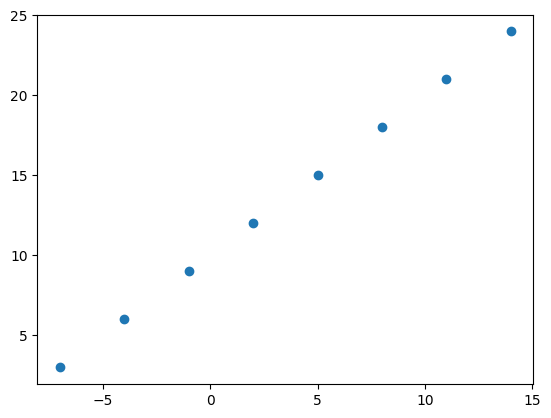

In [ ]:
# Import libraries for numerical operations and plotting
import numpy as np
import matplotlib.pyplot as plt

# Create features (input values) - these are our X values
X=np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (target values) - these are our Y values 
# Notice: y = X + 10 (this is the pattern we want our model to learn)
y=np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Plot the data to visualize the relationship between X and y
plt.scatter(X,y)

In [ ]:
# Test: Add 10 to each X value to see if we get y values
# This helps us understand the pattern: y = X + 10
X+10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [ ]:
# Check if y equals X+10 for each data point
# This confirms our pattern: the relationship is y = X + 10
y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output shapes

In [ ]:
# Create example tensors to understand input/output shapes
# This represents house features (like bedrooms, bathrooms, garage)
house_info=tf.constant(["bedroom","bathroom","garage"])
# This represents the house price (what we want to predict)
house_price=tf.constant([939700])

# Display both tensors to see their structure
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
# Display our training data (features X and labels y)
X,y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [ ]:
# Check the data types of our arrays (they are NumPy arrays)
type(X) , type(y)

(numpy.ndarray, numpy.ndarray)

# Converting numpy arrays into tensors

In [ ]:
# Convert NumPy arrays to TensorFlow tensors
# TensorFlow works better with its own tensor format
X=tf.constant(X)
y=tf.constant(y)

# Check that they are now TensorFlow tensors
type(X) ,type(y)

(tensorflow.python.framework.ops.EagerTensor,
 tensorflow.python.framework.ops.EagerTensor)

In [ ]:
# Reshape X to be a column vector (required format for neural networks)
# -1 means "figure out this dimension automatically", 1 means "make it 1 column"
X=tf.reshape(X,shape=(-1,1))

In [ ]:
# Check the data types of our tensors (should be float32 for neural networks)
X.dtype , y.dtype

(tf.float64, tf.float64)

# Steps in Modelling with Tensorflow

## 1.Creating the model : Define input,output as well as hidden layers
## 2.Compiling the model: Define loss function,Optimizers,and evaluation metrices
## 3.Fitting a model    : Train the model on data by adjusting weights over multiple passes (epochs)

In [ ]:
# Set random seed for reproducible results
tf.random.set_seed(42)

# STEP 1: Creating the model using the Sequential API
# Sequential means layers are stacked one after another
# Dense(1) means 1 output neuron (for regression prediction)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# STEP 2: Compile the model (configure for training)
# loss: how we measure how wrong our predictions are (MAE = Mean Absolute Error)
# optimizer: how the model learns (SGD = Stochastic Gradient Descent)
# metrics: what we want to track during training
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"] )

# STEP 3: Fit the model (train it on our data)
# epochs=5 means the model will see all data 5 times during training
model.fit(X,y,epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step - loss: 10.9392 - mae: 10.9392
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.8067 - mae: 10.8067
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 10.6742 - mae: 10.6742
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 10.5417 - mae: 10.5417
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 10.4092 - mae: 10.4092


In [ ]:
# Check our training data to remind ourselves what we're working with
X ,y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Test our trained model by making a prediction
# We'll predict what y should be when X = 17.0
test_value=tf.constant([17.0])
y_pred=model.predict(test_value)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


In [ ]:
# Display the prediction result
# The correct answer should be 17 + 10 = 27, let's see how close we got!
y_pred

array([[15.462947]], dtype=float32)

# Improving our model

# we can improve our model by altering the steps we took to create a model

1.**Creating a model**
add more layers ,increase the number of hidden neurons within each of the hidden layers,change the activation function of each layer

2.**Compiling the model**
change the optimization functions or perhaps leanring rate

3.**Fitting a model**
fit the model for more epochs  or give model more data

# Improving the model by increasing the Epochs

In [ ]:
# Let's improve our model by training for more epochs (100 instead of 5)
# More epochs = more learning opportunities

# Set random seed for reproducible results
tf.random.set_seed(42)

# Create the same model architecture
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile with the same settings
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"] )

# Train for 100 epochs instead of 5 (more training time)
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step - loss: 14.6597 - mae: 14.6597
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14.5272 - mae: 14.5272
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 14.3947 - mae: 14.3947
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 14.2622 - mae: 14.2622
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 14.1297 - mae: 14.1297
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 13.9972 - mae: 13.9972
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 13.8647 - mae: 13.8647
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 13.7322 - mae: 13.7322
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13.5997 - mae: 13.5997
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 13.4672 - mae: 13.4672
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13.3347 - mae: 13.3347
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 13.2022 - mae: 13.2022
Epoch 13/100
1/1 ━━━━━━━

In [ ]:
# Test the improved model with the same test value
# Should be closer to 27 now with more training
model.predict(test_value)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


array([[29.77195]], dtype=float32)

# Improving the model by adding multiple hidden layers,changing optimizers, activation functions and also changing learning rate

In [ ]:
# Let's create a much deeper neural network with multiple hidden layers
# More layers can potentially learn more complex patterns

# Create a deeper model with 5 hidden layers
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),  # Hidden layer 1: 100 neurons, ReLU activation
    tf.keras.layers.Dense(100,activation="relu"),  # Hidden layer 2: 100 neurons, ReLU activation  
    tf.keras.layers.Dense(100,activation="relu"),  # Hidden layer 3: 100 neurons, ReLU activation
    tf.keras.layers.Dense(100,activation="relu"),  # Hidden layer 4: 100 neurons, ReLU activation
    tf.keras.layers.Dense(100,activation="relu"),  # Hidden layer 5: 100 neurons, ReLU activation
    tf.keras.layers.Dense(1)                       # Output layer: 1 neuron for regression
])

# Compile with improved optimizer (Adam is often better than SGD)
model.compile(
    loss=tf.keras.losses.mae,                      # Same loss function
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Adam optimizer with learning rate
    metrics=["mae"]                                # Track mean absolute error
)

# Train the deeper model for 100 epochs
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.5142 - mae: 13.5142
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 13.2701 - mae: 13.2701
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 13.0529 - mae: 13.0529
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 12.8216 - mae: 12.8216
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 12.5949 - mae: 12.5949
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 12.3500 - mae: 12.3500
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 12.0804 - mae: 12.0804
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 11.7579 - mae: 11.7579
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11.3794 - mae: 11.3794
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 10.9473 - mae: 10.9473
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 10.5248 - mae: 10.5248
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.1050 - mae: 10.1050
Epoch 13/100
1/1 ━━━━━━━━━━

In [ ]:
# Test our complex deep neural network
# With all these layers, it should learn the pattern very well
model.predict(test_value)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


array([[29.769737]], dtype=float32)

# Common ways to improve the deep learning model
1. Adding layers
2. Incresing the number of hidden units or hidden neurons
3. Changing the Activation,optimization functions and learning rate  
4. Fitting more data
5. Fitting for longer

# Evaluate a model

In [ ]:
# Create a larger dataset for better model evaluation
# Generate X values from -100 to 100 with step of 4
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Create corresponding y values using the same pattern: y = X + 10
y=X+10

y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

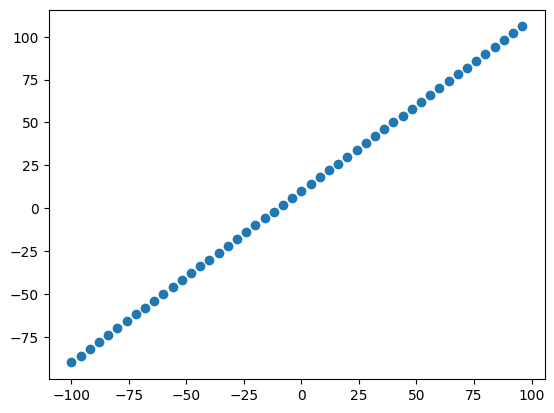

In [ ]:
# Visualize our larger dataset
# Should show a clear linear relationship: y = X + 10
plt.scatter(X,y)

# Tiny Example (Fruit Classifier)
You have 100 fruits:

60 for **training**: The model learns from this.

20 for **validation**: The model checks how well it's doing with different settings.

Try setting A → 85% accuracy

Try setting B → 92% accuracy ✅ (Better!)

20 for **testing**: After picking the best setting (B), now you test the final model on this data.

In [ ]:
# Check how many data points we have in our larger dataset
len(X)

50

In [ ]:
# Import train_test_split to divide our data properly
from sklearn.model_selection import train_test_split

# Convert TensorFlow tensors to NumPy arrays (required for sklearn)
X_np = X.numpy()
y_np = y.numpy()

# Split data: 80% for training, 20% for testing
# This helps us evaluate how well our model works on unseen data
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

# Check the sizes of our splits
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

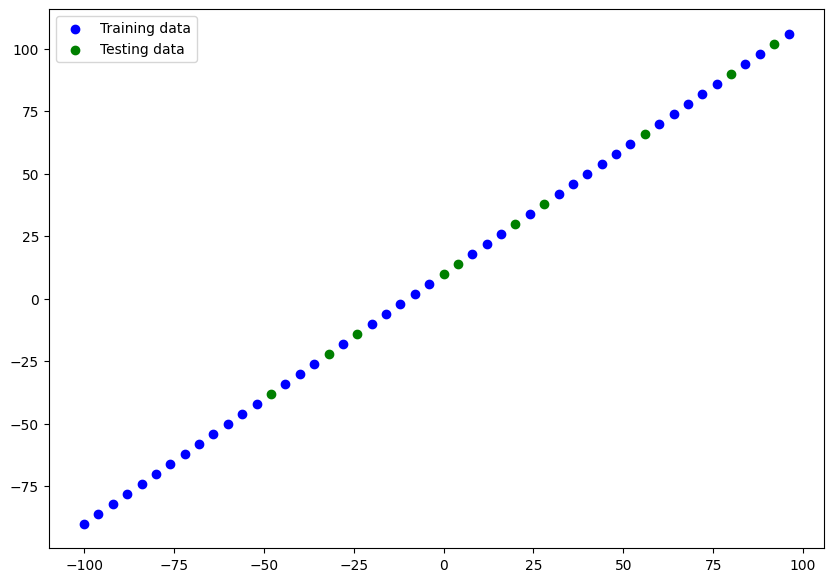

In [ ]:
# Visualize our training and testing data split
# Blue dots = training data (model learns from this)
# Green dots = testing data (model will be evaluated on this)
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="b",label="Training data")
plt.scatter(X_test,y_test,c="g",label="Testing data")
plt.legend()

In [ ]:
# Reshape training data to the format neural networks expect
# -1 means "figure out this dimension", 1 means "make it 1 column"
X_train=X_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)

In [ ]:
from os import name

# Create a neural network model with named layers (good practice for debugging)
model=tf.keras.Sequential([
    tf.keras.Input(shape=(1,),name="input_layer"),          # Input layer: expects 1 feature
    tf.keras.layers.Dense(10,name="hidden_layer"),          # Hidden layer: 10 neurons
    tf.keras.layers.Dense(1,name="output_layer")            # Output layer: 1 neuron for prediction
],name="Complete_neural_network")                           # Give the whole model a name

# Compile the model with Adam optimizer (generally better than SGD)
model.compile(
    loss=tf.keras.losses.mae,         # Mean Absolute Error loss
    optimizer=tf.keras.optimizers.Adam(),  # Adam optimizer (adaptive learning rate)
    metrics=["mae"]                   # Track MAE during training
)

# Train the model on our training data (verbose=0 means less output)
model.fit(X_train,y_train,epochs=100,verbose=0)

# ✅ Definition

* **Layer (type):**
  The name and type of each layer in the model (like Dense, Conv2D, etc.).

* **Output Shape:**
  The size of the data coming out of each layer.

* **Param #:**
  The number of values (weights and biases) the layer needs to learn.

* **Total params:**
  Total number of values the entire model needs to learn.

* **Trainable params:**
  Parameters that the model will update during training.

* **Non-trainable params:**
  Parameters that are fixed and won’t change during training.

In [ ]:
# Display detailed information about our model architecture
# Shows layers, output shapes, and number of parameters (weights + biases)
model.summary()

Model: "Complete_neural_network"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

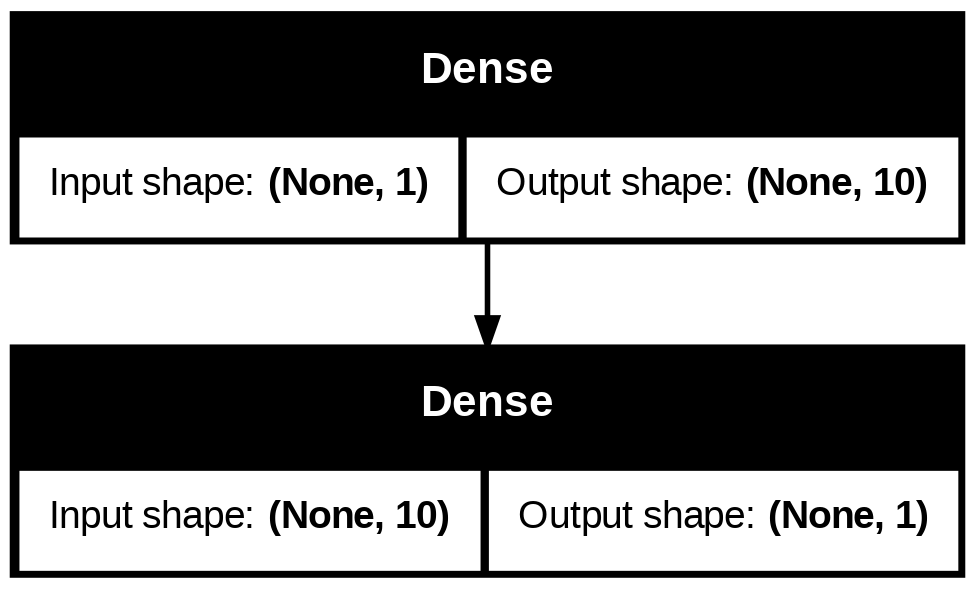

In [ ]:
# Create a visual diagram of our neural network architecture
# Shows how data flows through the layers with shapes
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

# Visualize our model predictions

In [ ]:
# Make predictions on our test data (data the model has never seen)
# This tells us how well our model generalizes to new data
y_pred=model.predict(X_test)

y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


array([[-3.8419571e+01],
       [ 4.4764297e+01],
       [ 1.5969880e+01],
       [ 6.3960567e+01],
       [-2.5622051e+01],
       [ 7.3558708e+01],
       [ 3.1723628e+00],
       [-2.7016666e-02],
       [ 2.2368639e+01],
       [-1.9223293e+01]], dtype=float32)

In [ ]:
# Show the actual correct answers (ground truth) for comparison with predictions
y_test

array([-38,  66,  30,  90, -22, 102,  14,  10,  38, -14], dtype=int32)

In [ ]:
# Create a function to visualize model performance
def plot_predictions(train_data=X_train,train_labels=y_train,
                     test_data=X_test,test_labels=y_test,predictions=y_pred):

  """
  Plots training data, test data and compares predictions to ground truth labels
  Blue = training data, Green = actual test data, Red = model predictions
  """

  plt.figure(figsize=(10,7))

  # Plot training data in blue (what the model learned from)
  plt.scatter(train_data,train_labels,c="b",label="Training data")

  # Plot actual test data in green (correct answers)
  plt.scatter(test_data,test_labels,c="g",label="Testing data")

  # Plot model predictions in red (what our model thinks the answers are)
  plt.scatter(test_data,predictions,c="r",label="Predictions")

  plt.legend()

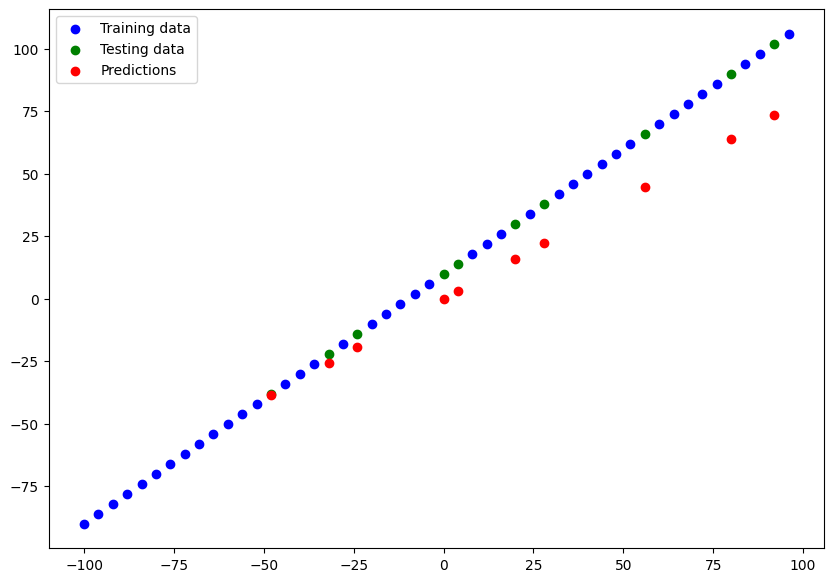

In [ ]:
# Call our plotting function to visualize how well the model performed
# Red dots should be close to green dots for good performance
plot_predictions()

# Evaluating our model's predictions with regression evaluation metrics

## Evaluation metrics for regressison
1. MAE
2. MSE
3. Hubor loss(MAE +MSE)

In [ ]:
# Evaluate our model on test data to get loss and metrics
# Lower numbers = better performance
model.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - loss: 13.5497 - mae: 13.5497


[13.549748420715332, 13.549748420715332]

In [ ]:
# Calculate evaluation metrics using scikit-learn
from sklearn.metrics import mean_absolute_error,mean_squared_error

# MAE: Average of absolute differences between predictions and actual values
mae=mean_absolute_error(y_test,y_pred)
# MSE: Average of squared differences (penalizes large errors more)
mse=mean_squared_error(y_test,y_pred)

mae,mse

(13.549748420715332, 263.7454528808594)

In [ ]:
# Check the shapes of our test data to ensure they match
X_test.shape ,y_test.shape

((10,), (10,))

In [ ]:
# Check the data type of our test data
type(X_test)

numpy.ndarray

# Mean Absolute Error

In [ ]:
# Calculate Mean Absolute Error using TensorFlow functions
mae_tensor=tf.metrics.mae(y_test,y_pred)

# Take the mean of all MAE values to get a single number
tf.reduce_mean(mae_tensor)

<tf.Tensor: shape=(), dtype=float32, numpy=13.549748420715332>

# Mean Squared Error

In [ ]:
# Calculate Mean Squared Error using TensorFlow functions
mse_tensor=tf.metrics.mse(y_test,y_pred)

# Take the mean of all MSE values to get a single number
tf.reduce_mean(mse_tensor)

<tf.Tensor: shape=(), dtype=float32, numpy=263.7454833984375>

In [ ]:
# Create reusable functions for calculating evaluation metrics
# This makes it easier to compare different models

def mae(y_test,y_pred):
  """Calculate Mean Absolute Error"""
  mae_tensor=tf.metrics.mae(y_test,y_pred)
  return tf.reduce_mean(mae_tensor)

def mse(y_test,y_pred):
  """Calculate Mean Squared Error"""
  mse_tensor=tf.metrics.mse(y_test,y_pred)
  return tf.reduce_mean(mse_tensor)

In [ ]:
# Test our custom metric functions
mae(y_test,y_pred),mse(y_test,y_pred)

(<tf.Tensor: shape=(), dtype=float32, numpy=13.549748420715332>,
 <tf.Tensor: shape=(), dtype=float32, numpy=263.7454833984375>)

# Running experiments to improve our model

## Get more Data
## Make your model larger
## train for longer

In [110]:
X_train,y_train

(array([[ -52],
        [ -84],
        [  48],
        [ -68],
        [ -88],
        [ -76],
        [  64],
        [  84],
        [  88],
        [ -40],
        [ -64],
        [ -36],
        [  -4],
        [  36],
        [  24],
        [-100],
        [  76],
        [   8],
        [  32],
        [ -80],
        [  16],
        [ -56],
        [  44],
        [ -96],
        [ -16],
        [ -92],
        [  72],
        [  40],
        [  -8],
        [  60],
        [ -60],
        [ -12],
        [ -28],
        [  96],
        [ -20],
        [ -72],
        [  68],
        [ -44],
        [  12],
        [  52]], dtype=int32),
 array([[-42],
        [-74],
        [ 58],
        [-58],
        [-78],
        [-66],
        [ 74],
        [ 94],
        [ 98],
        [-30],
        [-54],
        [-26],
        [  6],
        [ 46],
        [ 34],
        [-90],
        [ 86],
        [ 18],
        [ 42],
        [-70],
        [ 26],
        [-46],
        [ 54],


# 3 Modelling experiments

## model 1 : same as the original model, 1 layer,trained for 100 epochs
## model 2 : 2 layers trained for 100 epochs  
## model 3 : 2 layers trained for 500 epochs

# Build the model_1

In [ ]:
# EXPERIMENT: Build Model 1 (baseline model)
# Simple model with 1 layer, trained for 100 epochs

# Set random seed for reproducible results
tf.random.set_seed(42)

# Create simple model with just 1 Dense layer
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile with basic settings (SGD optimizer)
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# Train for 100 epochs
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - loss: 57.0778 - mae: 57.0778
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 19.4993 - mae: 19.4993
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.7598 - mae: 9.7598
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 11.4048 - mae: 11.4048
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.1076 - mae: 10.1076
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.3058 - mae: 9.3058
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.6552 - mae: 9.6552
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 10.0089 - mae: 10.0089
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.4187 - mae: 9.4187
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.6785 - mae: 9.6785
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 11.1324 - mae: 11.1324
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 10.0263 - mae: 10.0263
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


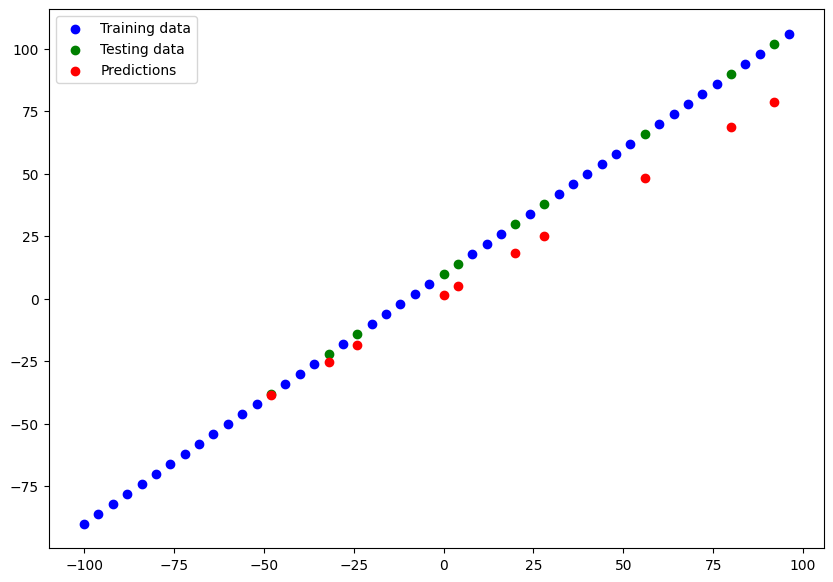

In [ ]:
# Make predictions with Model 1 and visualize the results
y_pred_1=model_1.predict(X_test)

plot_predictions(predictions=y_pred_1)

In [ ]:
# Calculate evaluation metrics for Model 1
mae_1 =mae(y_test,y_pred_1)
mse_1=mse(y_test,y_pred_1)

mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=11.221529006958008>,
 <tf.Tensor: shape=(), dtype=float32, numpy=179.24844360351562>)

## Building Model_2

# Two dense layers,train for 100 epochs

In [ ]:
# EXPERIMENT: Build Model 2 (improved model)
# 2 Dense layers, trained for 100 epochs

# Set the random seed for reproducibility
tf.random.set_seed(42)

# Create model with 2 layers (one hidden layer with 10 neurons)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10),    # Hidden layer with 10 neurons
    tf.keras.layers.Dense(1)      # Output layer with 1 neuron
])

# Compile with the same settings as Model 1 for fair comparison
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mse"]
)

# Train for 100 epochs (same as Model 1)
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 346ms/step - loss: 51.3097 - mse: 3196.8391
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 12.9996 - mse: 318.2944 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 12.5938 - mse: 285.2164 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 13.7112 - mse: 342.8104
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.3661 - mse: 109.3865
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.2020 - mse: 120.9647
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.8338 - mse: 145.1108
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 21.2429 - mse: 583.8959
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 10.6825 - mse: 179.5300
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 15.3657 - mse: 370.7782
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.1835 - mse: 107.7510
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.0375 - mse: 118.3021
Epoch 13/100
2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


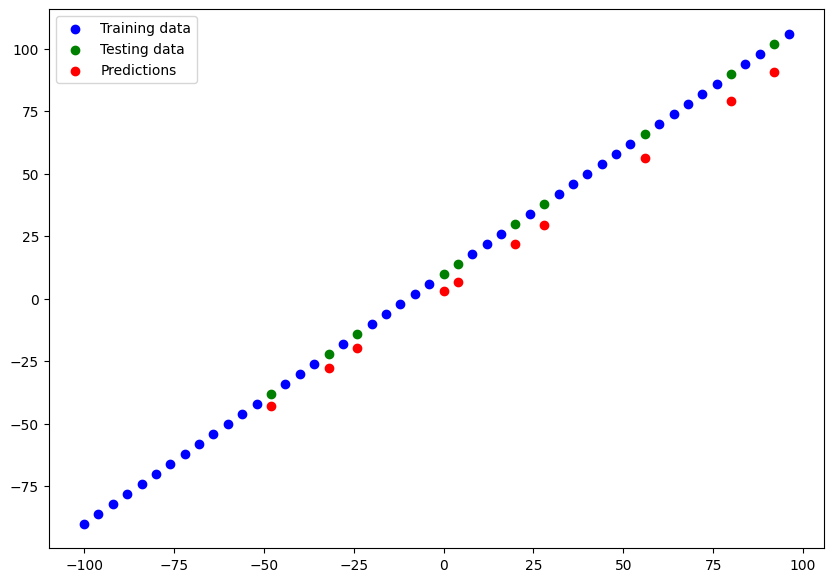

In [ ]:
# Make predictions with Model 2 and visualize the results
y_pred_2=model_2.predict(X_test)

plot_predictions(predictions=y_pred_2)

In [ ]:
# Calculate evaluation metrics for Model 2
mae_2=mae(y_test,y_pred_2)
mse_2=mse(y_test,y_pred_2)

mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=7.883404731750488>,
 <tf.Tensor: shape=(), dtype=float32, numpy=66.76719665527344>)

# Building model_3

## 2 Dense layers trained for 500 epochs

In [117]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# Fit the model
model_3.fit(X_train,y_train,epochs=500,verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


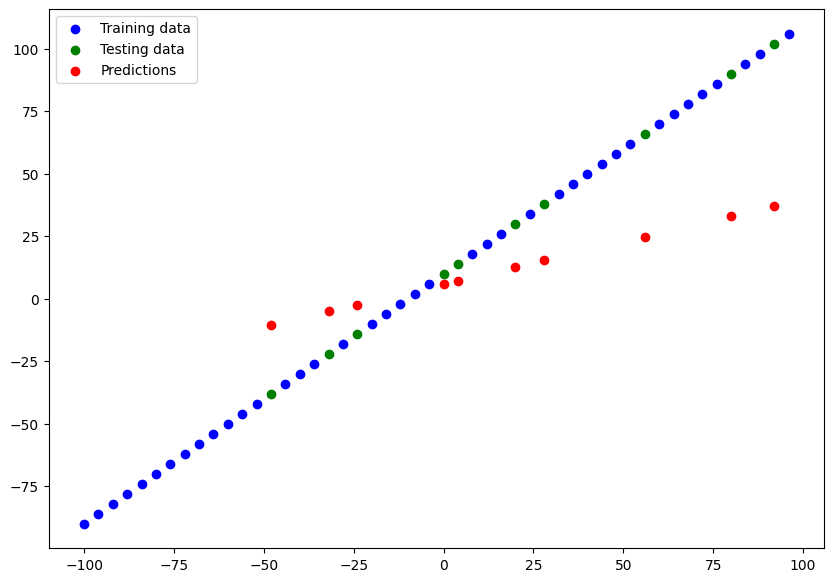

In [118]:
# Make and plot some predictions
y_pred_3=model_3.predict(X_test)

plot_predictions(predictions=y_pred_3)

In [119]:
# Calculate the model_3 evaluation metrics
mae_3=mae(y_test,y_pred_3)
mse_3=mse(y_test,y_pred_3)

mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=27.006210327148438>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1120.2469482421875>)

# Compare the results

In [120]:
import pandas as pd

model_results=[
    ["model_1",mae_1.numpy(),mse_1.numpy()],
    ["model_2",mae_2.numpy(),mse_2.numpy()],
    ["model_3",mae_3.numpy(),mse_3.numpy()]
]

final_table=pd.DataFrame(model_results,columns=["model","mae","mse"])

final_table

,model,mae,mse
0,model_1,11.221529,179.248444
1,model_2,7.883405,66.767197
2,model_3,27.006210,1120.246948


# Looks like model 2 performed better

In [121]:
# Model 2 performing really good comapred to other two
model_2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# The more experiments you do,the more you get to know which are really making you r model best or worst

# TENSOR BOARD

## TensorBoard is a tool that shows your machine learning training progress in graphs and charts so you can understand it easily.


# SAVING THE MODEL
1. **Time-saving** – Training can take hours or days; saving lets you skip that step.
2. **Reuse** – You can use the same trained model later for predictions on new data.
3. **Sharing** – You can send your model to others without sending all the training code and data.
4. **Deployment** – Saved models can be loaded into apps, websites, or devices to make real-time predictions.

In short: **You train once, save it, and reuse it whenever you need** — just like saving a game so you don’t start from level 1 again.


# Different ways to save the model

1. model.save() #.keras as format
2. HDF5 (.h5) Format
3. SavedModel (model.export())

# Since model_2 performed better lets save it

# Method 1 to save the model

In [ ]:
# Save Model 2 in Keras native format (.keras)
# This format is recommended for modern TensorFlow projects
model_2.save("generalized_model.keras")

# Method 2 to save the model

In [ ]:
# Save Model 2 in HDF5 format (.h5) 
# Older format, good for backward compatibility
model_2.save("generalized_model.h5")

# Method 3 to save model

In [ ]:
# Export Model 2 in SavedModel format (creates a folder)
# Best format for deployment and production use
model_2.export("generalized_model")

Saved artifact at 'generalized_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_39')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135270535151248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135270535145296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135270535143760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135270535148368: TensorSpec(shape=(), dtype=tf.resource, name=None)


# How one is different from other

| Format / Method  | File Type | When to Use / Best For                   | Pros                                  | Cons                                     |
| ---------------- | --------- | ---------------------------------------- | ------------------------------------- | ---------------------------------------- |
| **Keras native** | `.keras`  | Experiments, Colab, training & reloading | Simple, modern, single file           | Not ideal for deployment on servers/apps |
| **HDF5**         | `.h5`     | Legacy code or compatibility             | Single file, backward-compatible      | Less modern, may miss some new features  |
| **SavedModel**   | Folder    | Deployment, TensorFlow Serving, TFLite   | Full TensorFlow support, future-proof | Creates folder, slightly more complex    |

✅ **Tip:**

* For Colab experiments → `.keras`
* For old projects → `.h5`
* For deployment → `SavedModel` (`model.export()`)

# Loading back our model

In [ ]:
# Load our saved model back from disk
# This allows us to use the trained model later without retraining
from tensorflow import keras

model = keras.models.load_model("generalized_model.keras")

In [126]:
model.predict(test_value)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


array([[19.145428]], dtype=float32)

In [127]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [128]:
model_2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [129]:
model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[-42.731316 ],
       [ 56.271465 ],
       [ 22.001276 ],
       [ 79.11826  ],
       [-27.500114 ],
       [ 90.54166  ],
       [  6.7700787],
       [  2.9622793],
       [ 29.616875 ],
       [-19.884516 ]], dtype=float32)

In [130]:
model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


array([[-42.731316 ],
       [ 56.271465 ],
       [ 22.001276 ],
       [ 79.11826  ],
       [-27.500114 ],
       [ 90.54166  ],
       [  6.7700787],
       [  2.9622793],
       [ 29.616875 ],
       [-19.884516 ]], dtype=float32)

# Loaded perfectly
## model_2 and loaded model_2 exactly shows same results

In [131]:
model_2.predict(X_test) == model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# They exactly gives the same Evalution metrics

In [132]:
# Calculating Evalution metrics for loaded_model
mae_loaded=mae(y_test,model.predict(X_test))
mse_loaded=mse(y_test,model.predict(X_test))

mae_loaded,mse_loaded

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=7.883404731750488>,
 <tf.Tensor: shape=(), dtype=float32, numpy=66.76719665527344>)

In [133]:
# Calculating Evalution metrics for model_2
mae_loaded=mae(y_test,model_2.predict(X_test))
mse_loaded=mse(y_test,model_2.predict(X_test))

mae_loaded,mse_loaded

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=7.883404731750488>,
 <tf.Tensor: shape=(), dtype=float32, numpy=66.76719665527344>)

# Download a model (or any file) from Google Colab

## 1.open files tab and right click on file you want,you will see download option
## 2. use code

In [134]:
from google.colab import files

files.download("generalized_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Save a file from google colab to Google drive

In [135]:
!cp /content/generalized_model.keras /content/drive/MyDrive/tensorflow

In [136]:
!ls /content/drive/MyDrive/tensorflow

generalized_model.keras


#  WORKING ON LARGER DATA SET
## https://www.kaggle.com/datasets/mirichoi0218/insurance

In [ ]:
# Work with a real-world dataset: Insurance costs prediction
# This dataset contains information about people and their medical insurance costs

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the insurance dataset from CSV file
df=pd.read_csv("/content/insurance.csv")

# Display the first 5 rows to understand the data structure
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [138]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [139]:
len(df)

1338

In [140]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Convert categorical columns into numerical using one hot encoding

### Easiest way to do one hot encoding

In [ ]:
# Convert categorical columns (sex, smoker, region) into numerical format
# One-hot encoding creates binary columns for each category
# Example: "male" becomes [1,0], "female" becomes [0,1]
pd.get_dummies(df,dtype=int).head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Apply one-hot encoding to our dataframe permanently
# Now all categorical data is converted to numbers
df=pd.get_dummies(df,dtype=int)

In [143]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [144]:
# All Features except "charges" are independent
df.drop("charges",axis=1).head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


# Creating dependent and independent features

In [ ]:
# Separate features (X) and target variable (y)
# X = all columns except 'charges' (what we use to make predictions)
# y = 'charges' column (what we want to predict)
X=df.drop("charges",axis=1)
y=df["charges"]

# Splitting training and testing data using train test split

In [ ]:
# Split the insurance data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [147]:
len(X_train),len(y_train),len(X_test),len(y_test)

(1070, 1070, 268, 268)

In [148]:
len(X_train.columns)

11

# Lets Build the neural network

In [ ]:
# Build a neural network to predict insurance costs
# This model will learn patterns from age, BMI, smoking status, etc.

tf.random.set_seed(42)

# Create a simple 2-layer neural network
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),    # Hidden layer: 10 neurons
    tf.keras.layers.Dense(1)      # Output layer: 1 neuron (insurance cost prediction)
])

# Compile the model for regression
insurance_model.compile(
    loss=tf.keras.losses.mae,                 # Mean Absolute Error loss
    optimizer=tf.keras.optimizers.SGD(),      # SGD optimizer  
    metrics=["mae"]                           # Track MAE during training
)

# Train the model on insurance data
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 10180.7715 - mae: 10180.7715
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7572.9468 - mae: 7572.9468
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7515.3638 - mae: 7515.3638
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7363.0601 - mae: 7363.0601
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7300.4937 - mae: 7300.4937
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7275.5146 - mae: 7275.5146
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7829.2251 - mae: 7829.2251
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7817.5771 - mae: 7817.5771
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7648.9526 - mae: 7648.9526
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7606.5811 - mae: 7606.5811
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7352.9795 - mae: 7352.9795
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

# Check results on testing data

In [ ]:
# Evaluate how well our insurance model performs on unseen test data
# This gives us the loss (MAE) and metrics on data the model never saw during training
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 6173.4648 - mae: 6173.4648


[5961.82568359375, 5961.82568359375]

# Lets improve our model

## add an extra layer with more hidden units
## train for longer
## (Do your own experiments like changing leanring rates,optimizers,....)

In [151]:
#Set the random seed
tf.random.set_seed(42)

# Creat the model
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fit the model
insurance_model_2.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 13274.9453 - mae: 13274.9453
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13141.0674 - mae: 13141.0674
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12867.5742 - mae: 12867.5742
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12302.8447 - mae: 12302.8447
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11288.5645 - mae: 11288.5645
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9856.9414 - mae: 9856.9414
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8392.9668 - mae: 8392.9668
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7514.8735 - mae: 7514.8735
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7362.1279 - mae: 7362.1279
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7335.4253 - mae: 7335.4253
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7314.6216 - mae: 7314.6216
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━

In [152]:
# Evaluate the insurance_model_2 with testing data

insurance_model_2.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 5012.7261 - mae: 5012.7261


[4865.07666015625, 4865.07666015625]

In [153]:
# Evaluate the insurance_model with testing data

insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6173.4648 - mae: 6173.4648 


[5961.82568359375, 5961.82568359375]

# Incresing training with 200 epochs

In [154]:
#Set the random seed
tf.random.set_seed(42)

# Creat the model
insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fit the model
insurance_model_2.fit(X_train,y_train,epochs=200,verbose=1)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4813.6997 - mae: 4813.6997
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4742.3638 - mae: 4742.3638
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4667.7402 - mae: 4667.7402
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4588.2568 - mae: 4588.2568
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4504.5913 - mae: 4504.5913
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4416.2544 - mae: 4416.2544
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4327.4717 - mae: 4327.4717
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4237.0415 - mae: 4237.0415
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4152.5039 - mae: 4152.5039
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4065.7422 - mae: 4065.7422
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3985.6689 - mae: 3985.6689
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

In [155]:
# Evaluating the model_3 on testing data
insurance_model_3.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 13425.9502 - mae: 13425.9502


[12969.7392578125, 12969.7392578125]

# Early stopping
## Early stopping is just a way to **stop training your model when it stops getting better** on validation data, so it doesn’t waste time or start overfitting.

It’s like saying:

> “You’ve learned enough — any more and you’ll just start memorizing instead of understanding.”


# Preprocessing Data (Normalization and Standardization)

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

df=pd.read_csv("/content/insurance.csv")

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# ADVANCED: Preprocess data properly with scaling and encoding
# This often improves model performance significantly

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Split features and target (start fresh)
X = df.drop("charges", axis=1)
y = df["charges"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define preprocessing steps:
# - Scale numeric columns (age, bmi, children) to 0-1 range
# - One-hot encode categorical columns (sex, smoker, region)
preprocessor = ColumnTransformer([
    ("scale", MinMaxScaler(), ["age", "bmi", "children"]),
    ("encode", OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
])

# Apply preprocessing: fit on training data, transform both train and test
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

In [158]:
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [159]:
X_train_prepared[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [160]:
insurance_model_2.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)

# Lets build the neural network

In [ ]:
# Build neural network for preprocessed data
# Preprocessed data often leads to better model performance

tf.random.set_seed(42)

# Create model with same architecture as before
insurance_model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100),   # Hidden layer 1: 100 neurons
    tf.keras.layers.Dense(10),    # Hidden layer 2: 10 neurons  
    tf.keras.layers.Dense(1)      # Output layer: 1 neuron
])

# Compile with Adam optimizer (often better than SGD)
insurance_model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),    # Adam optimizer
    metrics=["mae"]
)

# Train on preprocessed data (should perform better!)
insurance_model_4.fit(X_train_prepared,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 13297.2109 - mae: 13297.2109
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13290.3799 - mae: 13290.3799
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13272.9727 - mae: 13272.9727
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13234.4131 - mae: 13234.4131
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13163.5752 - mae: 13163.5752
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13049.6133 - mae: 13049.6133
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12882.0010 - mae: 12882.0010
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12650.6826 - mae: 12650.6826
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12345.8486 - mae: 12345.8486
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11960.0732 - mae: 11960.0732
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11499.6289 - mae: 11499.6289
Epoch 12/100
34/34 ━━━━━━━━━━

In [ ]:
# Evaluate the model trained on properly preprocessed data
# Should show improved performance compared to the previous model
insurance_model_4.evaluate(X_test_prepared,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 3517.7078 - mae: 3517.7078


[3431.931640625, 3431.931640625]

# Early stopping 

We do **early stopping** so the model:

1. **Doesn’t overfit** – stops before it starts memorizing the training data.
2. **Saves time** – no point training 200 epochs if the best model was at epoch 37.
3. **Gives best generalization** – keeps the version of the model that works best on unseen (validation) data.

Basically: **train just enough, then stop** — like taking a cake out of the oven when it’s perfectly baked, not burnt.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. Make simple fake data (y = 2x + noise)
X = np.arange(0, 100, 1)
y = X * 2 + np.random.normal(0, 5, size=len(X))

# reshape for TensorFlow (needs 2D features)
X = X.reshape(-1, 1)

# 2. Build a simple model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(loss='mae', optimizer='adam', metrics=['mae'])

# 3. Early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)

# 4. Train with early stopping
history = model.fit(
    X, y,
    validation_split=0.2,
    epochs=500,
    callbacks=[early_stop],
    verbose=1
)

# 5. Plot training history
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# output for above code

## If you clearly observe i ran for 500 epochs but model stops its training at around 115 epoch because of early stopping

In [ ]:
'''Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 400ms/step - loss: 79.1333 - mae: 79.1333 - val_loss: 184.4258 - val_mae: 184.4258
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 78.5943 - mae: 78.5943 - val_loss: 183.1508 - val_mae: 183.1508
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 78.0560 - mae: 78.0560 - val_loss: 181.8727 - val_mae: 181.8727
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 77.5163 - mae: 77.5163 - val_loss: 180.5911 - val_mae: 180.5911
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 76.9751 - mae: 76.9751 - val_loss: 179.3058 - val_mae: 179.3058
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 76.4324 - mae: 76.4324 - val_loss: 178.0168 - val_mae: 178.0168
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 75.8880 - mae: 75.8880 - val_loss: 176.7235 - val_mae: 176.7235
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 75.3419 - mae: 75.3419 - val_loss: 175.4259 - val_mae: 175.4259
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 74.7939 - mae: 74.7939 - val_loss: 174.1236 - val_mae: 174.1236
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 74.2439 - mae: 74.2439 - val_loss: 172.8165 - val_mae: 172.8165
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 73.6918 - mae: 73.6918 - val_loss: 171.5043 - val_mae: 171.5043
Epoch 12/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 73.1375 - mae: 73.1375 - val_loss: 170.1868 - val_mae: 170.1868
Epoch 13/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 72.5810 - mae: 72.5810 - val_loss: 168.8637 - val_mae: 168.8637
Epoch 14/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 72.0221 - mae: 72.0221 - val_loss: 167.5349 - val_mae: 167.5349
Epoch 15/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 71.4608 - mae: 71.4608 - val_loss: 166.2003 - val_mae: 166.2003
Epoch 16/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 70.8969 - mae: 70.8969 - val_loss: 164.8595 - val_mae: 164.8595
Epoch 17/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 70.3305 - mae: 70.3305 - val_loss: 163.5124 - val_mae: 163.5124
Epoch 18/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 69.7614 - mae: 69.7614 - val_loss: 162.1590 - val_mae: 162.1590
Epoch 19/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 69.1895 - mae: 69.1895 - val_loss: 160.7989 - val_mae: 160.7989
Epoch 20/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 68.6149 - mae: 68.6149 - val_loss: 159.4321 - val_mae: 159.4321
Epoch 21/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 68.0373 - mae: 68.0373 - val_loss: 158.0583 - val_mae: 158.0583
Epoch 22/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 67.4569 - mae: 67.4569 - val_loss: 156.6776 - val_mae: 156.6776
Epoch 23/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 66.8735 - mae: 66.8735 - val_loss: 155.2897 - val_mae: 155.2897
Epoch 24/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 66.2870 - mae: 66.2870 - val_loss: 153.8946 - val_mae: 153.8946
Epoch 25/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 65.6974 - mae: 65.6974 - val_loss: 152.4920 - val_mae: 152.4920
Epoch 26/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 65.1047 - mae: 65.1047 - val_loss: 151.0819 - val_mae: 151.0819
Epoch 27/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 64.5088 - mae: 64.5088 - val_loss: 149.6642 - val_mae: 149.6642
Epoch 28/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 63.9097 - mae: 63.9097 - val_loss: 148.2388 - val_mae: 148.2388
Epoch 29/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 63.3073 - mae: 63.3073 - val_loss: 146.8054 - val_mae: 146.8054
Epoch 30/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 62.7015 - mae: 62.7015 - val_loss: 145.3642 - val_mae: 145.3642
Epoch 31/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 62.0923 - mae: 62.0923 - val_loss: 143.9148 - val_mae: 143.9148
Epoch 32/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 61.4798 - mae: 61.4798 - val_loss: 142.4573 - val_mae: 142.4573
Epoch 33/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 60.8638 - mae: 60.8638 - val_loss: 140.9915 - val_mae: 140.9915
Epoch 34/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 60.2442 - mae: 60.2442 - val_loss: 139.5175 - val_mae: 139.5175
Epoch 35/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 59.6211 - mae: 59.6211 - val_loss: 138.0349 - val_mae: 138.0349
Epoch 36/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 58.9945 - mae: 58.9945 - val_loss: 136.5438 - val_mae: 136.5438
Epoch 37/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 58.3642 - mae: 58.3642 - val_loss: 135.0441 - val_mae: 135.0441
Epoch 38/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 57.7302 - mae: 57.7302 - val_loss: 133.5356 - val_mae: 133.5356
Epoch 39/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 57.0926 - mae: 57.0926 - val_loss: 132.0184 - val_mae: 132.0184
Epoch 40/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 56.4512 - mae: 56.4512 - val_loss: 130.4923 - val_mae: 130.4923
Epoch 41/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 55.8061 - mae: 55.8061 - val_loss: 128.9572 - val_mae: 128.9572
Epoch 42/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 55.1571 - mae: 55.1571 - val_loss: 127.4130 - val_mae: 127.4130
Epoch 43/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 54.5043 - mae: 54.5043 - val_loss: 125.8598 - val_mae: 125.8598
Epoch 44/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 53.8477 - mae: 53.8477 - val_loss: 124.2973 - val_mae: 124.2973
Epoch 45/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 53.1871 - mae: 53.1871 - val_loss: 122.7256 - val_mae: 122.7256
Epoch 46/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 52.5226 - mae: 52.5226 - val_loss: 121.1444 - val_mae: 121.1444
Epoch 47/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 51.8541 - mae: 51.8541 - val_loss: 119.5539 - val_mae: 119.5539
Epoch 48/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 51.1816 - mae: 51.1816 - val_loss: 117.9538 - val_mae: 117.9538
Epoch 49/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 50.5051 - mae: 50.5051 - val_loss: 116.3442 - val_mae: 116.3442
Epoch 50/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 49.8251 - mae: 49.8251 - val_loss: 114.7258 - val_mae: 114.7258
Epoch 51/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 49.1440 - mae: 49.1440 - val_loss: 113.0984 - val_mae: 113.0984
Epoch 52/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 48.4591 - mae: 48.4591 - val_loss: 111.4616 - val_mae: 111.4616
Epoch 53/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 47.7703 - mae: 47.7703 - val_loss: 109.8154 - val_mae: 109.8154
Epoch 54/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 47.0774 - mae: 47.0774 - val_loss: 108.1594 - val_mae: 108.1594
Epoch 55/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 46.3804 - mae: 46.3804 - val_loss: 106.4936 - val_mae: 106.4936
Epoch 56/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 45.6793 - mae: 45.6793 - val_loss: 104.8179 - val_mae: 104.8179
Epoch 57/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 44.9740 - mae: 44.9740 - val_loss: 103.1321 - val_mae: 103.1321
Epoch 58/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 44.2645 - mae: 44.2645 - val_loss: 101.4362 - val_mae: 101.4362
Epoch 59/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 43.5507 - mae: 43.5507 - val_loss: 99.7302 - val_mae: 99.7302
Epoch 60/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 42.8330 - mae: 42.8330 - val_loss: 98.0140 - val_mae: 98.0140
Epoch 61/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 42.1114 - mae: 42.1114 - val_loss: 96.2877 - val_mae: 96.2877
Epoch 62/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 41.3855 - mae: 41.3855 - val_loss: 94.5512 - val_mae: 94.5512
Epoch 63/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 40.6553 - mae: 40.6553 - val_loss: 92.8043 - val_mae: 92.8043
Epoch 64/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 39.9207 - mae: 39.9207 - val_loss: 91.0469 - val_mae: 91.0469
Epoch 65/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 39.1817 - mae: 39.1817 - val_loss: 89.2790 - val_mae: 89.2790
Epoch 66/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 38.4383 - mae: 38.4383 - val_loss: 87.5005 - val_mae: 87.5005
Epoch 67/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 37.6907 - mae: 37.6907 - val_loss: 85.7116 - val_mae: 85.7116
Epoch 68/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 36.9397 - mae: 36.9397 - val_loss: 83.9124 - val_mae: 83.9124
Epoch 69/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 36.1843 - mae: 36.1843 - val_loss: 82.1027 - val_mae: 82.1027
Epoch 70/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 35.4245 - mae: 35.4245 - val_loss: 80.2824 - val_mae: 80.2824
Epoch 71/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 34.6602 - mae: 34.6602 - val_loss: 78.4512 - val_mae: 78.4512
Epoch 72/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 33.8913 - mae: 33.8913 - val_loss: 76.6092 - val_mae: 76.6092
Epoch 73/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 33.1179 - mae: 33.1179 - val_loss: 74.7561 - val_mae: 74.7561
Epoch 74/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 32.3398 - mae: 32.3398 - val_loss: 72.8920 - val_mae: 72.8920
Epoch 75/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 31.5571 - mae: 31.5571 - val_loss: 71.0167 - val_mae: 71.0167
Epoch 76/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 30.7696 - mae: 30.7696 - val_loss: 69.1302 - val_mae: 69.1302
Epoch 77/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 29.9774 - mae: 29.9774 - val_loss: 67.2324 - val_mae: 67.2324
Epoch 78/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 29.1805 - mae: 29.1805 - val_loss: 65.3233 - val_mae: 65.3233
Epoch 79/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 28.3788 - mae: 28.3788 - val_loss: 63.4028 - val_mae: 63.4028
Epoch 80/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 27.5723 - mae: 27.5723 - val_loss: 61.4709 - val_mae: 61.4709
Epoch 81/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 26.7610 - mae: 26.7610 - val_loss: 59.5274 - val_mae: 59.5274
Epoch 82/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 25.9521 - mae: 25.9521 - val_loss: 57.5768 - val_mae: 57.5768
Epoch 83/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 25.1470 - mae: 25.1470 - val_loss: 55.6179 - val_mae: 55.6179
Epoch 84/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 24.3385 - mae: 24.3385 - val_loss: 53.6496 - val_mae: 53.6496
Epoch 85/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 23.5275 - mae: 23.5275 - val_loss: 51.6737 - val_mae: 51.6737
Epoch 86/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 22.7183 - mae: 22.7183 - val_loss: 49.6901 - val_mae: 49.6901
Epoch 87/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 21.9057 - mae: 21.9057 - val_loss: 47.6976 - val_mae: 47.6976
Epoch 88/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 21.0894 - mae: 21.0894 - val_loss: 45.6952 - val_mae: 45.6952
Epoch 89/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 20.2691 - mae: 20.2691 - val_loss: 43.6825 - val_mae: 43.6825
Epoch 90/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 19.4445 - mae: 19.4445 - val_loss: 41.6589 - val_mae: 41.6589
Epoch 91/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 18.6153 - mae: 18.6153 - val_loss: 39.6240 - val_mae: 39.6240
Epoch 92/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 17.7984 - mae: 17.7984 - val_loss: 37.5905 - val_mae: 37.5905
Epoch 93/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 17.0085 - mae: 17.0085 - val_loss: 35.5603 - val_mae: 35.5603
Epoch 94/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 16.2209 - mae: 16.2209 - val_loss: 33.5304 - val_mae: 33.5304
Epoch 95/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 15.4369 - mae: 15.4369 - val_loss: 31.4996 - val_mae: 31.4996
Epoch 96/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 14.6733 - mae: 14.6733 - val_loss: 29.4787 - val_mae: 29.4787
Epoch 97/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 13.9234 - mae: 13.9234 - val_loss: 27.4734 - val_mae: 27.4734
Epoch 98/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 13.1787 - mae: 13.1787 - val_loss: 25.4760 - val_mae: 25.4760
Epoch 99/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 12.4364 - mae: 12.4364 - val_loss: 23.4808 - val_mae: 23.4808
Epoch 100/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.6946 - mae: 11.6946 - val_loss: 21.4837 - val_mae: 21.4837
Epoch 101/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 10.9518 - mae: 10.9518 - val_loss: 19.4815 - val_mae: 19.4815
Epoch 102/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.2095 - mae: 10.2095 - val_loss: 17.4738 - val_mae: 17.4738
Epoch 103/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.4762 - mae: 9.4762 - val_loss: 15.4648 - val_mae: 15.4648
Epoch 104/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.7481 - mae: 8.7481 - val_loss: 13.4512 - val_mae: 13.4512
Epoch 105/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.0422 - mae: 8.0422 - val_loss: 11.4492 - val_mae: 11.4492
Epoch 106/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.3585 - mae: 7.3585 - val_loss: 9.4855 - val_mae: 9.4855
Epoch 107/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 6.7181 - mae: 6.7181 - val_loss: 7.7384 - val_mae: 7.7384
Epoch 108/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 6.1434 - mae: 6.1434 - val_loss: 6.2429 - val_mae: 6.2429
Epoch 109/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5.6739 - mae: 5.6739 - val_loss: 5.0477 - val_mae: 5.0477
Epoch 110/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 5.3148 - mae: 5.3148 - val_loss: 4.2286 - val_mae: 4.2286
Epoch 111/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 5.1080 - mae: 5.1080 - val_loss: 3.7459 - val_mae: 3.7459
Epoch 112/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 5.0138 - mae: 5.0138 - val_loss: 3.5277 - val_mae: 3.5277
Epoch 113/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 4.9667 - mae: 4.9667 - val_loss: 3.4353 - val_mae: 3.4353
Epoch 114/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4.9468 - mae: 4.9468 - val_loss: 3.4396 - val_mae: 3.4396
Epoch 115/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 4.9324 - mae: 4.9324 - val_loss: 3.4839 - val_mae: 3.4839
Epoch 116/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 4.9266 - mae: 4.9266 - val_loss: 3.5344 - val_mae: 3.5344'''